# LZTR1
[Noonan syndrome-10 (NS10)](https://omim.org/entry/616564) is caused by heterozygous mutation in the LZTR1 gene.
[Noonan syndrome 2 (NS2)](https://omim.org/entry/605275) caused by homozygous or compound heterozygous mutation in the LZTR1 gene

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1


In [2]:
gene_symbol = 'LZTR1'
mane_tx_id = 'NM_006767.4'
mane_protein_id = 'NP_006758.2' # leucine-zipper-like transcriptional regulator 1

In [3]:
from ppktstore.registry import configure_phenopacket_registry

phenopacket_store_release = '0.1.21'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
print(f'Loaded {len(phenopackets)} phenopackets from {gene_symbol}')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Loaded 38 phenopackets from LZTR1
Individuals Processed: 100%|██████████| 38/38 [00:00<00:00, 195.25individuals/s]
Loaded 38 individuals
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #4
    individual
     warnings:
     ·`time_element` is in currently unsupported format `ontology_class`
     ·`time_element` is in currently unsupported format `ontology_class`


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Hypertrophic cardiomyopathy,HP:0001639,27
Low-set ears,HP:0000369,26
Posteriorly rotated ears,HP:0000358,21
Hypertelorism,HP:0000316,20
Downslanted palpebral fissures,HP:0000494,19
Short neck,HP:0000470,18
Short stature,HP:0004322,16
Ptosis,HP:0000508,16
Epicanthus,HP:0000286,16
Low posterior hairline,HP:0002162,15


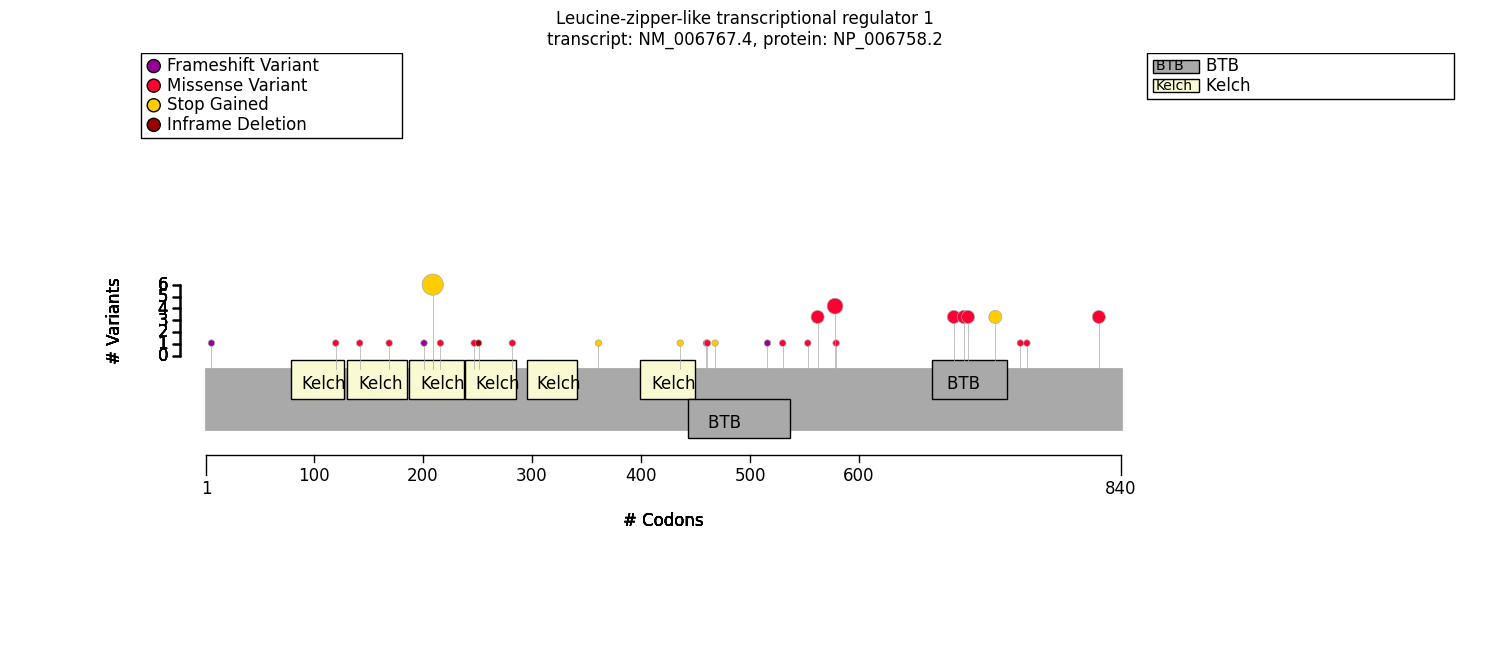

In [6]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

# Genotype Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region

from gpsea.analysis.predicate.genotype import VariantPredicates, biallelic_predicate

missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_predicate = biallelic_predicate(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other",
    partitions=((0,1),(2,))
)
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=missense_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,69
HMF03,Skipping term because of a child term with the same individual counts,6
HMF08,Skipping general term,81
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,170


In [ ]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       Missense/Missense OR Missense/Other  \
                                                                                 Count   
Micrognathia [HP:0000347]                                                         3/13   
Global developmental delay [HP:0001263]                                          11/13   
Cystic hygroma [HP:0000476]                                                       2/11   
Atrial septal defect [HP:0001631]                                                  2/9   
Hypertelorism [HP:0000316]                                                       12/16   
Polyhydramnios [HP:0001561]                                                       1/10   
Hypertrophic cardiomyopathy [HP:0001639]                                         16/18   
Low-set ears [HP:0000369]                                                        13/15   
Ptosis [HP:0000508]                                                               9/19   
Increased nuchal translucency [HP:0010880]                                        5/13   
Midface retrusion [HP:0011800]                                                    6/13   
Low posterior hairline [HP:0002162]                                               8/16   
Short stature [HP:0004322]                                                        8/16   
Short neck [HP:0000470]                                                           9/17   
Abnormal axial skeleton morphology [HP:0009121]                                  15/15   
Cardiomyopathy [HP:0001638]                                                      16/16   
Downslanted palpebral fissures [HP:0000494]                                      10/17   
Slanting of the palpebral fissure [HP:0200006]                                   10/10   
Abnormality of the palpebral fissures [HP:0008050]                               12/12   
Abnormal eyelid morphology [HP:0000492]                                          14/14   
Abnormal ocular adnexa morphology [HP:0030669]                                   16/16   
Posteriorly rotated ears [HP:0000358]                                            12/13   
Abnormal location of ears [HP:0000357]                                           14/14   
Abnormal pinna morphology [HP:0000377]                                           14/14   
Abnormality of the hairline [HP:0009553]                                           9/9   

Allele group                                               Other/Other  \
                                                   Percent       Count   
Micrognathia [HP:0000347]                              23%         6/7   
Global developmental delay [HP:0001263]                85%         2/8   
Cystic hygroma [HP:0000476]                            18%         4/5   
Atrial septal defect [HP:0001631]                      22%         6/7   
Hypertelorism [HP:0000316]                             75%         3/8   
Polyhydramnios [HP:0001561]                            10%        5/10   
Hypertrophic cardiomyopathy [HP:0001639]               89%        7/11   
Low-set ears [HP:0000369]                              87%        7/11   
Ptosis [HP:0000508]                                    47%        3/11   
Increased nuchal translucency [HP:0010880]             38%         2/3   
Midface retrusion [HP:0011800]                         46%         5/8   
Low posterior hairline [HP:0002162]                    50%        7/11   
Short stature [HP:0004322]                             50%        4/10   
Short neck [HP:0000470]                                53%        5/12   
Abnormal axial skeleton morphology [HP:0009121]       100%       10/10   
Cardiomyopathy [HP:0001638]                           100%         7/7   
Downslanted palpebral fissures [HP:0000494]            59%        6/11   
Slanting of the palpebral fissure [HP:0200006]        100%         6/6   
Abnormality of the palpebral fissures [HP:0008050]    100%         6/6   
Abnormal eyelid

In [11]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region

from gpsea.analysis.predicate.genotype import VariantPredicates

n_term = VariantPredicates.region(region=Region(0, 500), tx_id=mane_tx_id)
n_term_predicate = biallelic_predicate(
    a_predicate=n_term,
    b_predicate=~n_term,
    a_label="N Term",
    b_label="Other",
    partitions=((0,1),(2,))
)
n_term_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=n_term_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=n_term_result)


Allele group                                       N Term/N Term OR N Term/Other  \
                                                                           Count   
Hypertrophic cardiomyopathy [HP:0001639]                                    8/13   
Epicanthus [HP:0000286]                                                     7/13   
Short stature [HP:0004322]                                                  4/13   
Low posterior hairline [HP:0002162]                                         9/13   
Polyhydramnios [HP:0001561]                                                  1/8   
Low-set ears [HP:0000369]                                                   8/12   
Midface retrusion [HP:0011800]                                              5/12   
Global developmental delay [HP:0001263]                                     7/13   
Posteriorly rotated ears [HP:0000358]                                      12/12   
Cystic hygroma [HP:0000476]                                                  2/8   
Micrognathia [HP:0000347]                                                   4/11   
Curly hair [HP:0002212]                                                     5/12   
Pectus excavatum [HP:0000767]                                               4/13   
Ptosis [HP:0000508]                                                         6/13   
Short neck [HP:0000470]                                                     7/14   
Abnormal axial skeleton morphology [HP:0009121]                            12/12   
Cardiomyopathy [HP:0001638]                                                  8/8   
Downslanted palpebral fissures [HP:0000494]                                 8/14   
Slanting of the palpebral fissure [HP:0200006]                               8/8   
Abnormality of the palpebral fissures [HP:0008050]                         10/10   
Abnormal eyelid morphology [HP:0000492]                                    12/12   
Abnormal ocular adnexa morphology [HP:0030669]                             12/12   
Abnormal location of ears [HP:0000357]                                     12/12   
Abnormal pinna morphology [HP:0000377]                                     12/12   
Hypertelorism [HP:0000316]                                                  8/13   
Increased nuchal translucency [HP:0010880]                                   3/8   
Abnormality of the hairline [HP:0009553]                                     9/9   
Atrial septal defect [HP:0001631]                                           5/10   

Allele group                                               Other/Other  \
                                                   Percent       Count   
Hypertrophic cardiomyopathy [HP:0001639]               62%       15/16   
Epicanthus [HP:0000286]                                54%        4/16   
Short stature [HP:0004322]                             31%        8/13   
Low posterior hairline [HP:0002162]                    69%        6/14   
Polyhydramnios [HP:0001561]                            12%        5/12   
Low-set ears [HP:0000369]                              67%       12/14   
Midface retrusion [HP:0011800]                         42%         6/9   
Global developmental delay [HP:0001263]                54%         6/8   
Posteriorly rotated ears [HP:0000358]                 100%        9/10   
Cystic hygroma [HP:0000476]                            25%         4/8   
Micrognathia [HP:0000347]                              36%         5/9   
Curly hair [HP:0002212]                                42%        3/11   
Pectus excavatum [HP:0000767]                          31%        7/16   
Ptosis [HP:0000508]                                    46%        6/17   
Short neck [HP:0000470]                                50%        7/15   
Abnormal axial skeleton morphology [HP:0009121]       100%       13/13   
Cardiomyopathy [HP:0001638]                           100%       15/15   
Downslanted palpebral fissures [HP:0000494]            57%        8/14   